In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv(r"C:\Users\mohite\Desktop\preparation\Titanic_EDA\titanic\train.csv")
test = pd.read_csv(r"C:\Users\mohite\Desktop\preparation\Titanic_EDA\titanic\test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Shape of dataset:", train.shape)
print("\nColumns:", train.columns)
print("\nData types:\n", train.dtypes)

Shape of dataset: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing Values Summary

- **Age:** 177 missing values — about 20% of the data.  
- **Cabin:** 687 missing values — over 75% missing, so it’s not reliable.
- **Embarked:** 2 missing values — very few, so we can fill this easily.


In [13]:
train['Age'].fillna(train['Age'].median())
train['Embarked'].fillna(train['Embarked'].mode()[0])
train.drop('Cabin', axis=1, errors='ignore', inplace=True)


### Handling Missing Values — Why Median and Mode?

- **Age:** I used the **median** instead of the mean because the median is more robust to outliers. For example, very high ages could skew the mean, but the median gives a more realistic central value.
- **Embarked:** Since this is a categorical column with only two missing values, I used the **mode** (most frequent value) to fill it. This preserves the distribution of embarkation points.
- **Cabin:** Over 75% of the `Cabin` column is missing, so it doesn’t add reliable information. Therefore, I chose to drop this column.


In [14]:
train.duplicated().sum()


np.int64(0)

In [15]:
male_ind =len(train[train['Sex'] == 'male'])
print("no of males in titanic:" ,male_ind)

no of males in titanic: 577


In [16]:
female_ind =len(train[train['Sex'] == 'female'])
print("no of femalesmales in titanic:" ,female_ind)

no of femalesmales in titanic: 314


Text(0.5, 1.0, 'Survival Count')

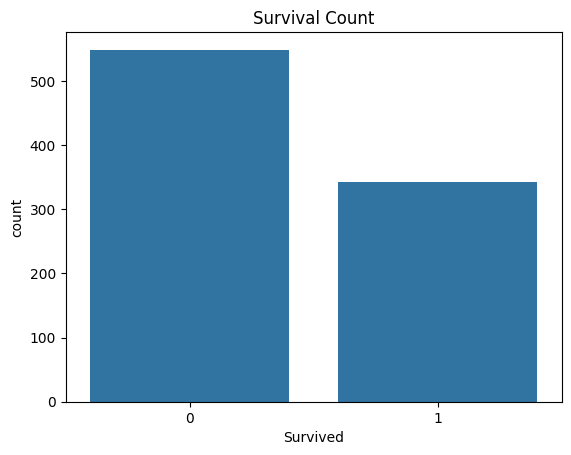

In [18]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')


Text(0.5, 1.0, 'Survival by Sex')

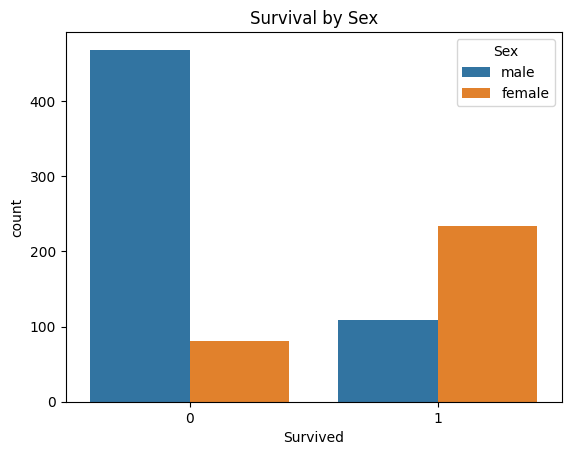

In [19]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Sex')


Text(0.5, 1.0, 'Survival by Pclass')

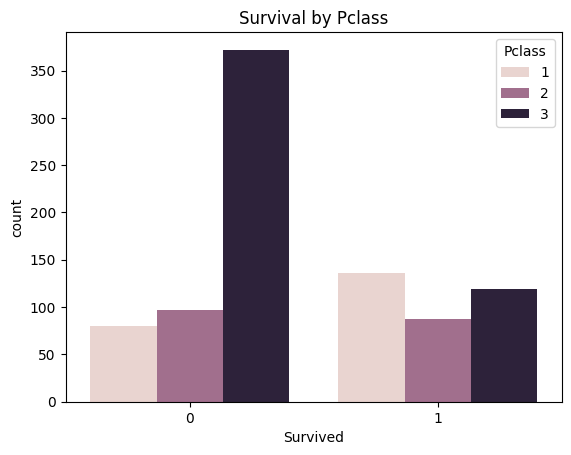

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Pclass')


Text(0.5, 1.0, 'Age Distribution')

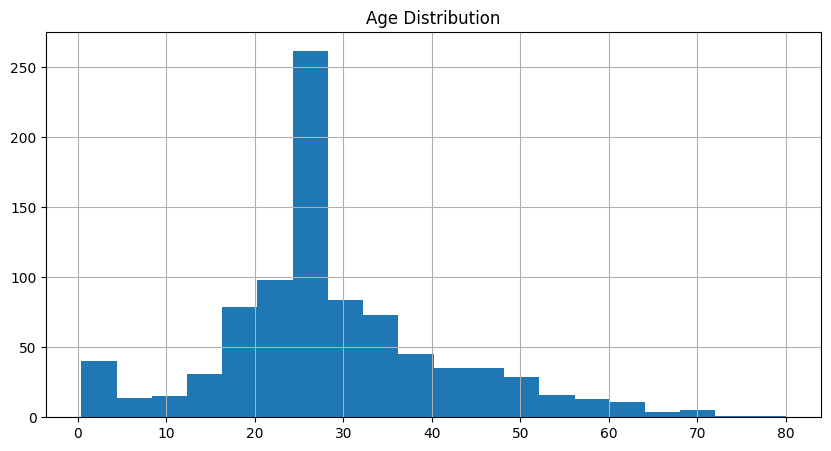

In [21]:
train['Age'].hist(bins=20, figsize=(10,5))
plt.title('Age Distribution')


Text(0.5, 1.0, 'Fare Distribution')

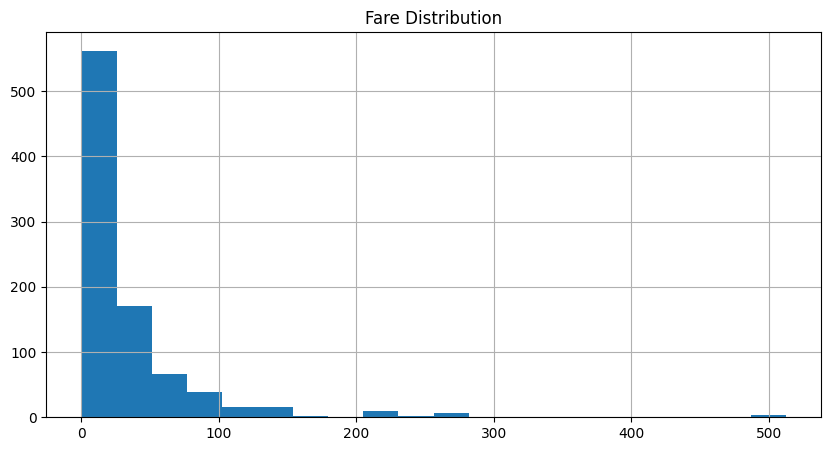

In [22]:
train['Fare'].hist(bins=20, figsize=(10,5))
plt.title('Fare Distribution')


<Axes: >

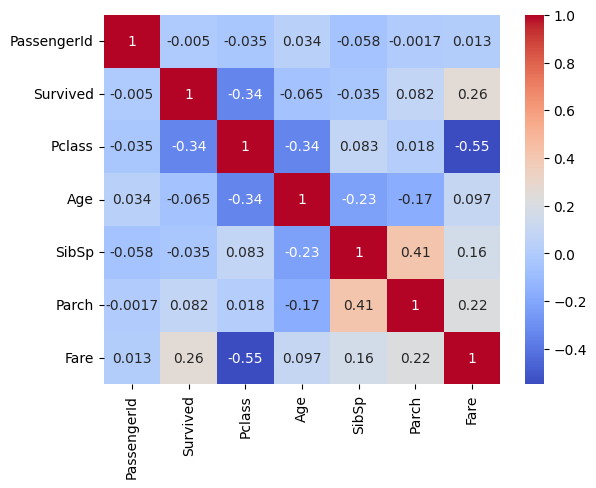

In [24]:
# Only numeric columns
corr_matrix = train.select_dtypes(include=['number']).corr()

# Then plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='FamilySize', ylabel='count'>

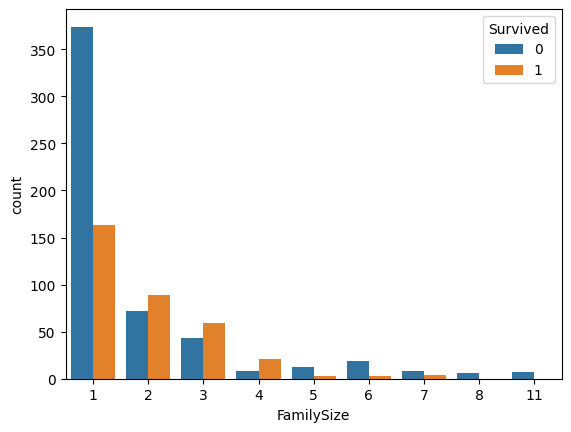

In [25]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=train)


Passengers with small families survived more

Women and children had higher survival rates.

1st class passengers survived more.

Age distribution shows most were young adults.

Fare correlates with class and survival.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [27]:
# Select features and target
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
Y = train['Survived']

# Convert categoricals
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(Y_test, Y_pred_lr)
print("Accuracy Score:", acc_lr)
confusion_mat = confusion_matrix(Y_test,Y_pred_lr)
print(confusion_mat)

Accuracy Score: 0.7649253731343284
[[131  25]
 [ 38  74]]


In [32]:
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy Score:", acc_svm)
confusion_mat = confusion_matrix(Y_test,Y_pred_svm)
print(confusion_mat)


Accuracy Score: 0.7649253731343284
[[137  19]
 [ 44  68]]


In [33]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(Y_test, Y_pred_nb)
print("Accuracy Score:", acc_nb)
confusion_mat = confusion_matrix(Y_test,Y_pred_nb)
print(confusion_mat)

Accuracy Score: 0.7835820895522388
[[135  21]
 [ 37  75]]


In [34]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy Score:",acc_knn)
confusion_mat = confusion_matrix(Y_test, Y_pred_knn)
print(confusion_mat)

Accuracy Score: 0.7574626865671642
[[138  18]
 [ 47  65]]


In [35]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy Score:",acc_dt )
confusion_mat = confusion_matrix(Y_test, Y_pred_dt)
print(confusion_mat)

Accuracy Score: 0.7350746268656716
[[128  28]
 [ 43  69]]


### Confusion Matrix Layout

|                      | **Predicted Survived = 1** | **Predicted Survived = 0** |
|----------------------|----------------------------|----------------------------|
| **Actual Survived = 1** | True Positive (TP)          | False Negative (FN)         |
| **Actual Survived = 0** | False Positive (FP)         | True Negative (TN)  
### Confusion Matrix Interpretation

- **True Positives (TP):** Passengers correctly predicted as survived.
- **True Negatives (TN):** Passengers correctly predicted as did not survive.
- **False Positives (FP):** Passengers predicted as survived but did not.
- **False Negatives (FN):** Passengers predicted as did not survive but actually did.

 This helps us understand where our model makes mistakes. For example:
- A high number of **False Negatives** means the model is missing people who actually survived.
- A high number of **False Positives** means the model incorrectly predicts survival for people who didn’t.

Good models try to maximize TP and TN, and minimize FP and FN.


In [37]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine', 'Naive Bayes','KNN','Decision Tree'],
    'Score': [acc_lr, acc_svm, acc_nb, acc_knn, acc_dt]
})

results = results.sort_values(by='Score', ascending=False)
results = results.set_index('Score')
results


,Model
Score,
0.783582,Naive Bayes
0.764925,Logistic Regression
0.764925,Support Vector Machine
0.757463,KNN
0.735075,Decision Tree


(0.0, 1.0)

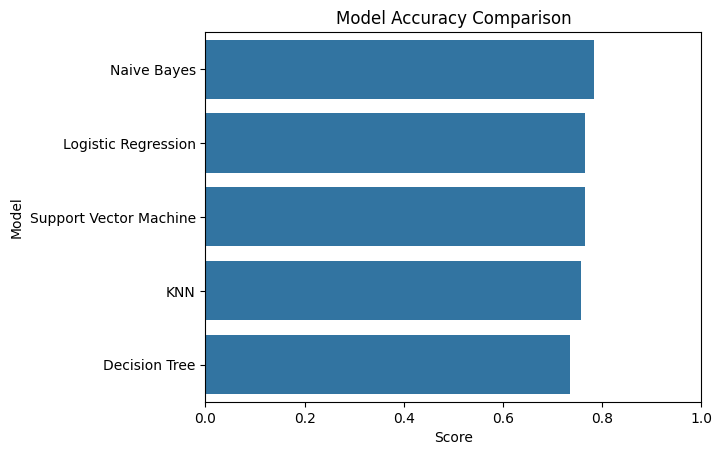

In [38]:
sns.barplot(x='Score', y='Model', data=results.reset_index())
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)


### Final Model Comparison:
- Naive Bayes performed best on this dataset (~78%).
- Logistic Regression close behind.
- Other models showed slightly lower accuracy.